In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

In [2]:
movie_data = Path("Resources/mo_movies_data.parquet")
movie_data_df = pd.read_parquet(movie_data)
movie_data_df.head()

,Title,Year,IMDB Rating,IMDB Votes,Genre,Box Office,IMDB ID,Budget,Revenue
0,Camille Claudel 1915,2013,6.5,3889.0,"Biography, Drama","$35,296",tt2018086,3512454,115860.0
1,A Sound of Thunder,2005,4.2,20549.0,"Action, Adventure, Horror","$1,900,451",tt0318081,80000000,5989640.0
2,The Jacket,2005,7.1,119641.0,"Drama, Fantasy, Mystery","$6,303,762",tt0366627,29000000,21126225.0
3,The Interpreter,2005,6.4,111280.0,"Crime, Mystery, Thriller","$72,708,161",tt0373926,80000000,162944923.0
4,The Ring Two,2005,5.4,101457.0,"Horror, Mystery","$76,231,249",tt0377109,50000000,161451538.0


In [3]:
movie_data_df["ROI$"] = (movie_data_df['Revenue'] - movie_data_df['Budget'])
movie_data_df

,Title,Year,IMDB Rating,IMDB Votes,Genre,Box Office,IMDB ID,Budget,Revenue,ROI$
0,Camille Claudel 1915,2013,6.5,3889.0,"Biography, Drama","$35,296",tt2018086,3512454,115860.0,-3396594.0
1,A Sound of Thunder,2005,4.2,20549.0,"Action, Adventure, Horror","$1,900,451",tt0318081,80000000,5989640.0,-74010360.0
2,The Jacket,2005,7.1,119641.0,"Drama, Fantasy, Mystery","$6,303,762",tt0366627,29000000,21126225.0,-7873775.0
3,The Interpreter,2005,6.4,111280.0,"Crime, Mystery, Thriller","$72,708,161",tt0373926,80000000,162944923.0,82944923.0
4,The Ring Two,2005,5.4,101457.0,"Horror, Mystery","$76,231,249",tt0377109,50000000,161451538.0,111451538.0
...,...,...,...,...,...,...,...,...,...,...
2311,FC Venus,2005,5.5,2325.0,"Comedy, Romance, Sport",N/A,tt0453365,2196531,2411594.0,215063.0
2312,Sivaji,2007,7.5,21484.0,"Action, Crime, Drama",N/A,tt0479751,12000000,19000000.0,7000000.0
2313,Dikari,2006,6.5,693.0,Comedy,N/A,tt0933361,800000,1328612.0,528612.0
2314,Pro lyuboff,2010,5.8,297.0,Drama,N/A,tt1718881,2000000,1268793.0,-731207.0


In [4]:
year_agg = movie_data_df.groupby(['Year']).agg({'IMDB Rating': ['mean', 'median', 'var', 'std', 'sem']})
year_agg

IMDB Rating                                     
            mean median       var       std       sem
Year                                                 
2005    6.354450   6.50  1.025020  1.012432  0.073257
2006    6.386321   6.50  1.058817  1.028988  0.070671
2007    6.506771   6.60  1.033933  1.016825  0.073383
2008    6.301932   6.40  1.204948  1.097701  0.076296
2009    6.417972   6.50  0.891296  0.944085  0.064089
2010    6.368996   6.40  0.887061  0.941839  0.062238
2011    6.327039   6.40  0.999654  0.999827  0.065501
2012    6.402913   6.45  1.011894  1.005929  0.070086
2013    6.512500   6.50  0.876345  0.936133  0.062548
2014    6.375962   6.40  1.111690  1.054367  0.073107
2015    6.491878   6.60  0.842179  0.917703  0.065384

In [5]:
#pd.set_option('display.float_format', '{:.0f}'.format)

In [6]:
movie_data_df.dtypes

Title           object
Year            object
IMDB Rating    float64
IMDB Votes     float64
Genre           object
Box Office      object
IMDB ID         object
Budget           int64
Revenue        float64
ROI$           float64
dtype: object

In [7]:
movie_data_df['IMDB Rating'].max()


9.0

In [8]:
max_movie = movie_data_df.loc[movie_data_df['IMDB Rating'] == 9.0]
max_movie

,Title,Year,IMDB Rating,IMDB Votes,Genre,Box Office,IMDB ID,Budget,Revenue,ROI$
555,The Dark Knight,2008,9.0,2896249.0,"Action, Crime, Drama","$534,987,076",tt0468569,185000000,1.004558e+09,819558444.0


In [9]:
movie_data_df['IMDB Rating'].min()


1.2

In [10]:
min_movie = movie_data_df.loc[movie_data_df['IMDB Rating'] == 1.2]
min_movie

,Title,Year,IMDB Rating,IMDB Votes,Genre,Box Office,IMDB ID,Budget,Revenue,ROI$
2282,"Kidnapping, Caucasian Style",2014,1.2,604.0,Comedy,N/A,tt4537362,3500000,179000.0,-3321000.0


In [11]:
movie_data_count = len(movie_data_df['Title'].unique())
movie_data_count

2316

In [12]:
average_rating = movie_data_df['IMDB Rating'].mean()
average_rating

6.403151986183075

In [13]:
ratings_percentiles = movie_data_df['IMDB Rating'].quantile([.1,.9])
lowerq = ratings_percentiles[.1]
upperq = ratings_percentiles[.9]

print(lowerq)
print(upperq)

5.2
7.6


(array([  4.,   5.,  19.,  46., 154., 366., 756., 650., 290.,  26.]),
 array([1.2 , 1.98, 2.76, 3.54, 4.32, 5.1 , 5.88, 6.66, 7.44, 8.22, 9.  ]),
 <BarContainer object of 10 artists>)

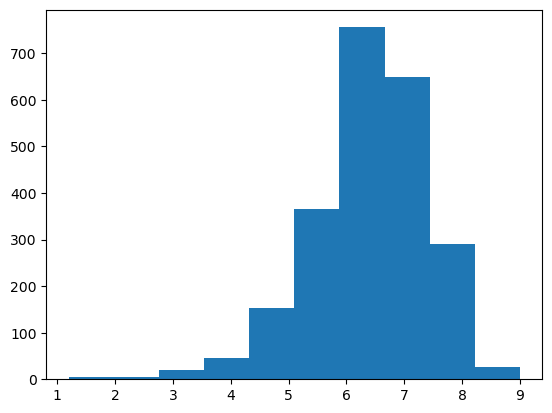

In [14]:
plt.hist(movie_data_df['IMDB Rating'])

In [15]:
def line_reg(x_values, y_values, xlabel, ylabel):
    slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.plot(x_values,regress_values,"r-")
    plt.ticklabel_format(useOffset = False, style='plain')
    plt.xticks(rotation = 45)
    print(f"The r-squared is: {rvalue**2}")

The r-squared is: 0.007212228236935369


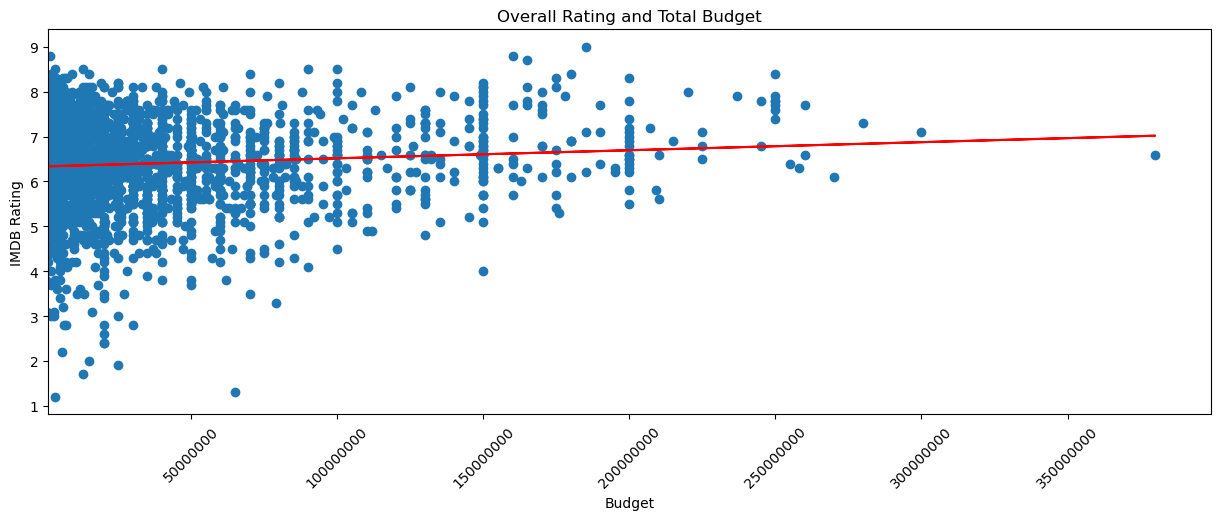

In [16]:

x_values = movie_data_df['Budget']
y_values = movie_data_df['IMDB Rating']
plt.figure(figsize=(15,5))
line_reg(x_values, y_values, 'Budget', 'IMDB Rating')
plt.xlim(1000000)
plt.title("Overall Rating and Total Budget")
plt.show()

The r-squared is: 0.03925924432280283


(0.0, 3000000000.0)

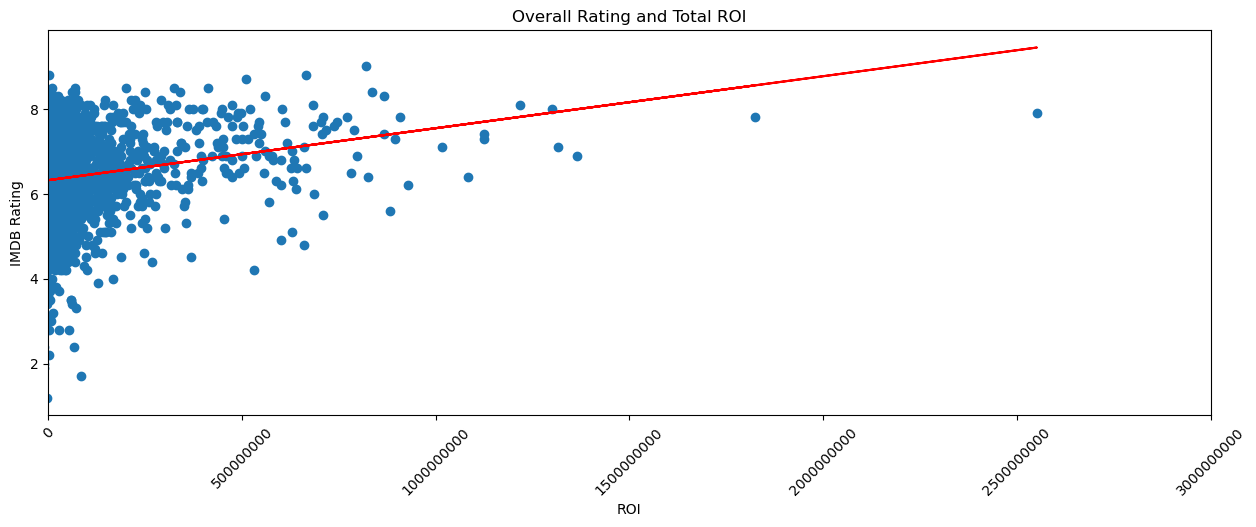

In [17]:
x_values = movie_data_df['ROI$']
y_values = movie_data_df['IMDB Rating']
plt.figure(figsize=(15,5))
line_reg(x_values, y_values, 'ROI', 'IMDB Rating')
plt.title("Overall Rating and Total ROI")
plt.xlim(0, 3000000000)


The r-squared is: 0.03398518604361464


(0.0, 2600000000.0)

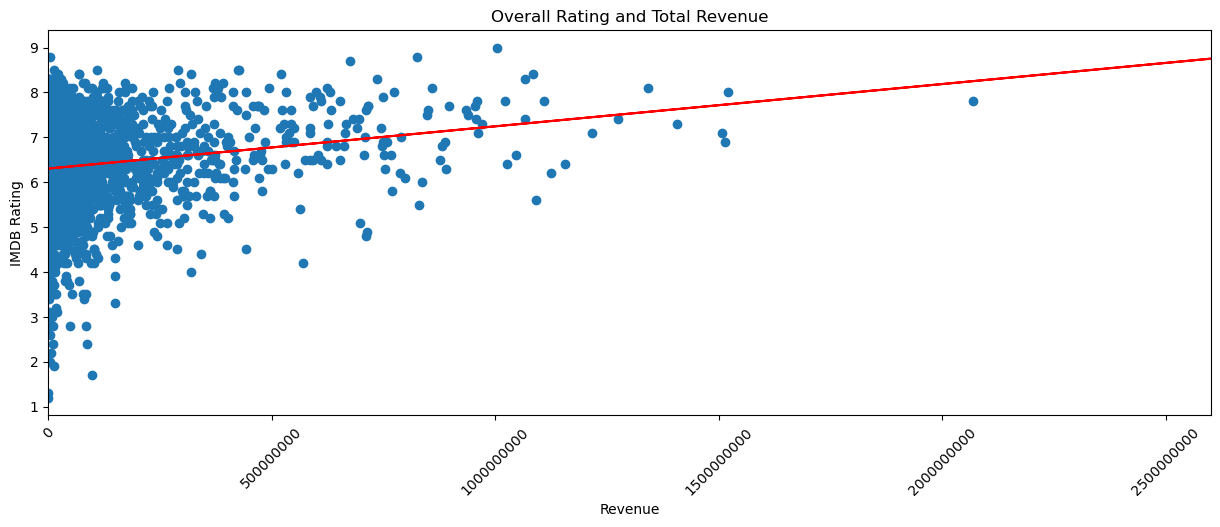

In [18]:
x_values = movie_data_df['Revenue']
y_values = movie_data_df['IMDB Rating']
plt.figure(figsize=(15,5))
line_reg(x_values, y_values, 'Revenue', 'IMDB Rating')
plt.title("Overall Rating and Total Revenue")
plt.xlim(0, 2600000000)


In [19]:
unique = list(movie_data_df["Genre"].unique())

genre_set = set()
for genres in unique:
    split = genres.replace(" ", "").split(",")
    genre_set.update(split)


genre_count = {k:[movie_data_df[movie_data_df["Genre"].str.contains(k)]["Title"].count(),\
                 movie_data_df[movie_data_df["Genre"].str.contains(k)]["IMDB Rating"].mean(),\
                 movie_data_df[movie_data_df["Genre"].str.contains(k)]["IMDB Votes"].sum()] for k in genre_set}
genre_count_df = pd.DataFrame(genre_count).T.rename(columns ={0:"count", 1:"Genre Rating", 2:"Genre Votes"})
genre_count_df

,count,Genre Rating,Genre Votes
Sport,45.0,6.548889,4658356.0
Fantasy,185.0,6.082162,32832156.0
Romance,395.0,6.400506,37600416.0
Music,85.0,6.548235,6819152.0
Horror,224.0,5.670982,23211040.0
Sci-Fi,191.0,6.354974,61118846.0
War,46.0,6.863043,6089730.0
Biography,165.0,7.022424,24281916.0
Mystery,249.0,6.260643,37134978.0
Western,9.0,6.844444,2252130.0


NameError: name 'tick_locations' is not defined

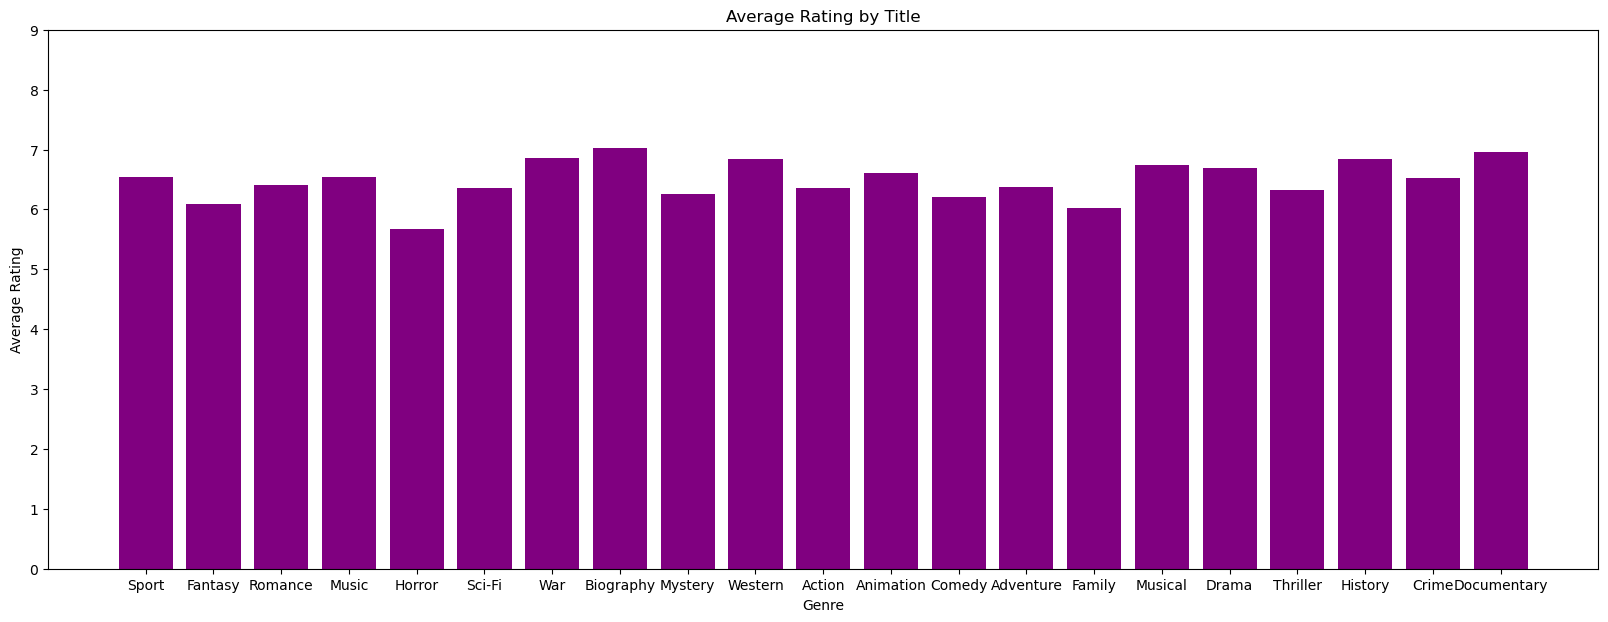

In [20]:
plt.figure(figsize=(20,7))
plt.ylim(0, 9)
plt.xlabel("Genre")
plt.ylabel("Average Rating")
plt.title("Average Rating by Title")
plt.bar(genre_count_df.index, genre_count_df["Genre Rating"], color='purple', align="center")
plt.xticks(tick_locations, genre_count_df["Genre Rating"], rotation="vertical")
plt.show()

NameError: name 'tick_locations' is not defined

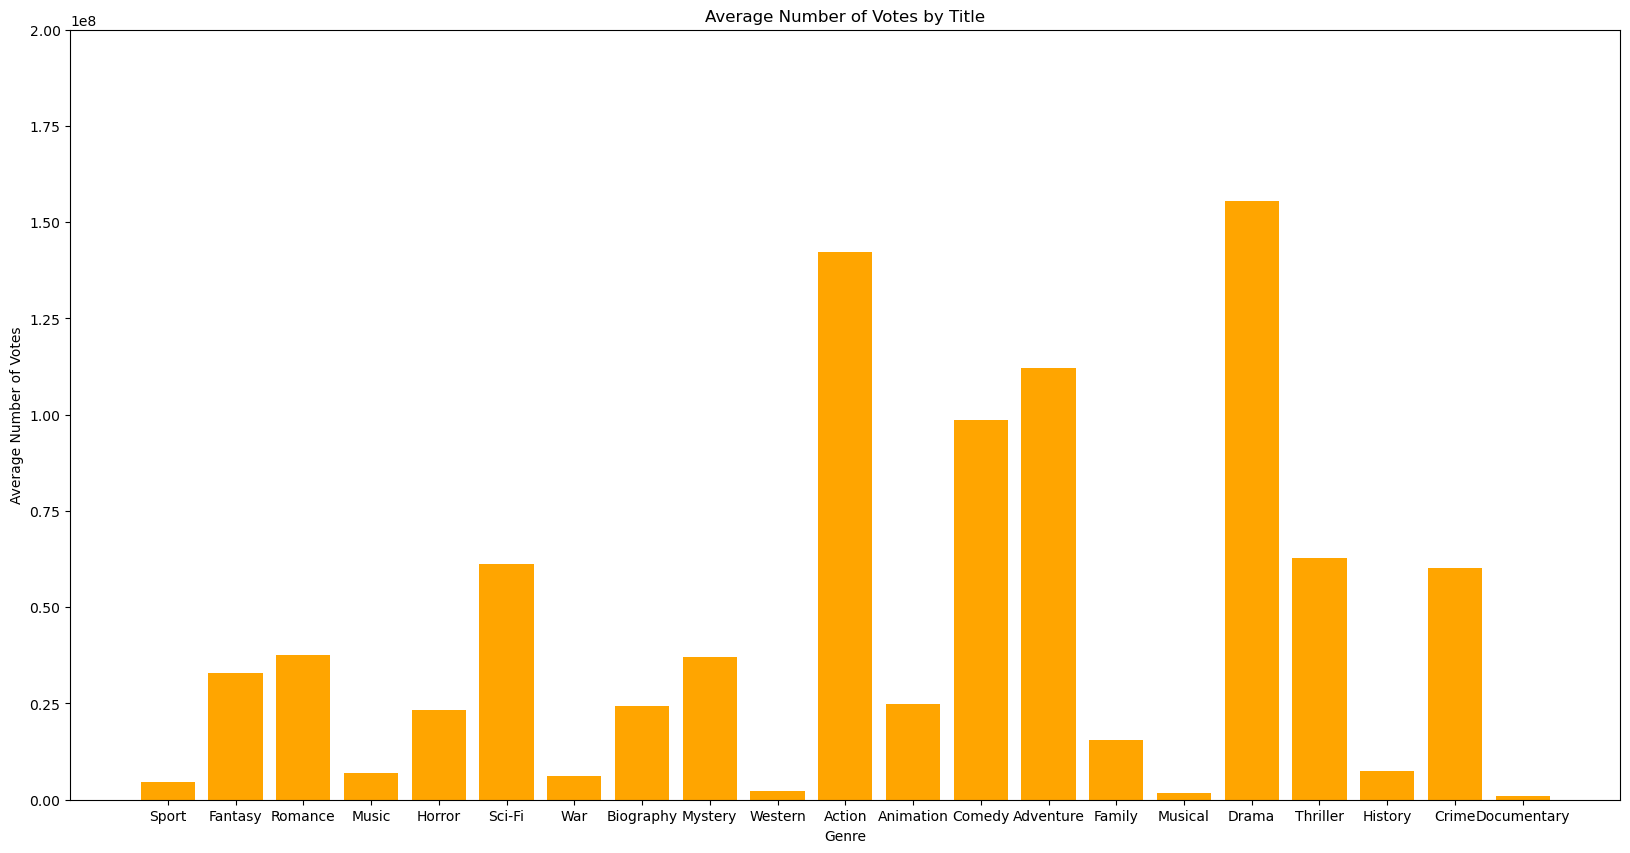

In [21]:
plt.figure(figsize=(20,10))
plt.ylim(0, 200000000)
plt.xlabel("Genre")
plt.ylabel("Average Number of Votes")
plt.title("Average Number of Votes by Title")
plt.bar(genre_count_df.index, genre_count_df["Genre Votes"], color='orange', align="center")
plt.xticks(tick_locations, genre_count_df["Genre Rating"], rotation=45)
plt.show()

In [22]:
ratings_percentiles = movie_data_df['IMDB Rating'].quantile([.25,.75])
lowerq = ratings_percentiles[.25]
upperq = ratings_percentiles[.75]
print(lowerq)
print(upperq)

low_rating = movie_data_df[(movie_data_df["IMDB Rating"] <= 5.8)]
high_rating = movie_data_df[(movie_data_df["IMDB Rating"] >= 7.1)]

5.8
7.1


In [23]:
total_average_rating = movie_data_df.groupby(['Year'])['ROI$'].mean()
total_average_rating

Year
2005    4.971873e+07
2006    4.769563e+07
2007    6.037184e+07
2008    5.864701e+07
2009    6.728564e+07
2010    6.326699e+07
2011    6.477650e+07
2012    8.338829e+07
2013    7.427038e+07
2014    8.785150e+07
2015    1.003721e+08
Name: ROI$, dtype: float64

In [24]:
low_rating_roi = movie_data_df[(movie_data_df["IMDB Rating"] <= 5.8)]
low_rating

,Title,Year,IMDB Rating,IMDB Votes,Genre,Box Office,IMDB ID,Budget,Revenue,ROI$
1,A Sound of Thunder,2005,4.2,20549.0,"Action, Adventure, Horror","$1,900,451",tt0318081,80000000,5989640.0,-74010360.0
4,The Ring Two,2005,5.4,101457.0,"Horror, Mystery","$76,231,249",tt0377109,50000000,161451538.0,111451538.0
7,White Noise,2005,5.5,50974.0,"Drama, Horror, Mystery","$56,386,759",tt0375210,10000000,91196419.0,81196419.0
8,Elektra,2005,4.7,98572.0,"Action, Adventure, Crime","$24,409,722",tt0357277,43000000,56681566.0,13681566.0
9,Racing Stripes,2005,5.2,18296.0,"Adventure, Comedy, Drama","$49,772,522",tt0376105,30000000,93772522.0,63772522.0
...,...,...,...,...,...,...,...,...,...,...
2309,Beremennyy,2011,4.0,3581.0,"Comedy, Fantasy",N/A,tt1820462,2000000,8000000.0,6000000.0
2310,Na kryuchke!,2011,4.9,321.0,"Comedy, Romance",N/A,tt1820555,3000000,1957000.0,-1043000.0
2311,FC Venus,2005,5.5,2325.0,"Comedy, Romance, Sport",N/A,tt0453365,2196531,2411594.0,215063.0
2314,Pro lyuboff,2010,5.8,297.0,Drama,N/A,tt1718881,2000000,1268793.0,-731207.0


In [25]:
year_low = low_rating.groupby(['Year'])['ROI$'].mean()
year_low

Year
2005    1.921531e+07
2006    2.022465e+07
2007    1.983084e+07
2008    4.052551e+07
2009    4.838698e+07
2010    4.883449e+07
2011    4.075702e+07
2012    3.257623e+07
2013    4.148024e+07
2014    5.822119e+07
2015    2.852031e+07
Name: ROI$, dtype: float64

In [26]:
high_rating = movie_data_df[(movie_data_df["IMDB Rating"] >= 7.1)]

high_rating

,Title,Year,IMDB Rating,IMDB Votes,Genre,Box Office,IMDB ID,Budget,Revenue,ROI$
2,The Jacket,2005,7.1,119641.0,"Drama, Fantasy, Mystery","$6,303,762",tt0366627,29000000,21126225.0,-7873775.0
10,Coach Carter,2005,7.3,173672.0,"Biography, Drama, Sport","$67,264,877",tt0393162,30000000,76669806.0,46669806.0
29,Sin City,2005,8.0,796178.0,"Crime, Thriller","$74,103,820",tt0401792,40000000,158733820.0,118733820.0
37,Kingdom of Heaven,2005,7.3,318873.0,"Action, Adventure, Drama","$47,398,413",tt0320661,130000000,211643158.0,81643158.0
40,Star Wars: Episode III - Revenge of the Sith,2005,7.6,851789.0,"Action, Adventure, Fantasy","$380,270,577",tt0121766,113000000,850000000.0,737000000.0
...,...,...,...,...,...,...,...,...,...,...
2269,The Tiger,2015,7.2,6489.0,"Action, Adventure, Drama",N/A,tt5066556,5000,11083449.0,11078449.0
2271,Bwakaw,2012,7.2,367.0,Drama,N/A,tt2244376,11178,34659.0,23481.0
2277,O Kadhal Kanmani,2015,7.4,6785.0,"Drama, Musical, Romance",N/A,tt4271820,940000,5100000.0,4160000.0
2307,Fanaa,2006,7.1,35217.0,"Action, Drama, Romance","$2,105,352",tt0439662,5300000,22175908.0,16875908.0


In [27]:
year_high = high_rating.groupby(['Year'])['ROI$'].mean()
year_high

Year
2005    7.088197e+07
2006    8.055199e+07
2007    9.164197e+07
2008    9.671137e+07
2009    1.177783e+08
2010    1.045740e+08
2011    1.107529e+08
2012    1.471988e+08
2013    1.449598e+08
2014    1.690057e+08
2015    1.575953e+08
Name: ROI$, dtype: float64

In [28]:
average_rating = movie_data_df[(movie_data_df["IMDB Rating"] >= 5.8) &  (movie_data_df["IMDB Rating"] <= 7.1)]
average_rating

,Title,Year,IMDB Rating,IMDB Votes,Genre,Box Office,IMDB ID,Budget,Revenue,ROI$
0,Camille Claudel 1915,2013,6.5,3889.0,"Biography, Drama","$35,296",tt2018086,3512454,115860.0,-3396594.0
2,The Jacket,2005,7.1,119641.0,"Drama, Fantasy, Mystery","$6,303,762",tt0366627,29000000,21126225.0,-7873775.0
3,The Interpreter,2005,6.4,111280.0,"Crime, Mystery, Thriller","$72,708,161",tt0373926,80000000,162944923.0,82944923.0
5,A Scanner Darkly,2006,7.0,117810.0,"Animation, Comedy, Crime","$5,501,616",tt0405296,8700000,7659918.0,-1040082.0
6,Charlie and the Chocolate Factory,2005,6.7,533360.0,"Adventure, Comedy, Family","$206,459,076",tt0367594,150000000,474968763.0,324968763.0
...,...,...,...,...,...,...,...,...,...,...
2306,Battalion,2015,6.5,1703.0,"Action, Drama, History",N/A,tt4187590,10000000,7547762.0,-2452238.0
2307,Fanaa,2006,7.1,35217.0,"Action, Drama, Romance","$2,105,352",tt0439662,5300000,22175908.0,16875908.0
2308,"S Novym godom, mamy!",2012,6.3,2476.0,"Comedy, Drama",N/A,tt2592500,2000000,11666088.0,9666088.0
2313,Dikari,2006,6.5,693.0,Comedy,N/A,tt0933361,800000,1328612.0,528612.0


In [29]:
year_average = average_rating.groupby(['Year'])['ROI$'].mean()
year_average

Year
2005    5.120434e+07
2006    4.445563e+07
2007    6.301807e+07
2008    5.085986e+07
2009    4.827193e+07
2010    5.012104e+07
2011    5.319055e+07
2012    7.264901e+07
2013    5.846486e+07
2014    6.862705e+07
2015    1.061381e+08
Name: ROI$, dtype: float64

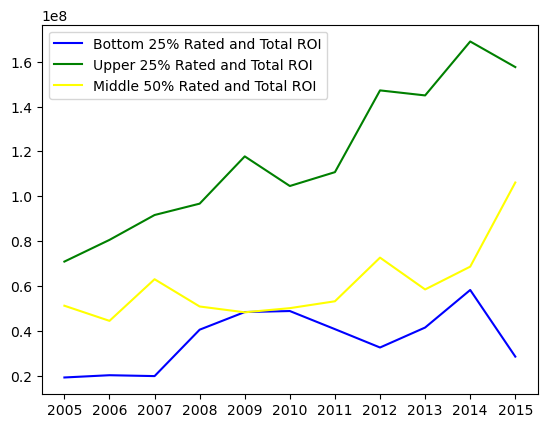

In [32]:
plt.title = "Top and Bottom Ten Percent Ratings ROI vs Average ROI"
low_average, = plt.plot(year_low.index, year_low, color="blue", label="Bottom 25% Rated and Total ROI" )
high_average, = plt.plot(year_high.index, year_high, color="green",label= "Upper 25% Rated and Total ROI")
average_average, = plt.plot(year_average.index, year_average, color="yellow", label="Middle 50% Rated and Total ROI")
plt.legend(handles=[low_average, high_average, average_average], loc="best")

# Show the chart
plt.show()